#Project 1

In [1]:
#Import libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [2]:
%matplotlib inline

In [3]:
#Import data
df = pd.read_csv("Avila-DataSet for miniprojects.csv")
df.head()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,"Class: A, B, C, D, E, F, G, H, I, W, X, Y"
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
df.columns

Index(['Intercolumnar distance ', 'upper margin ', ' lower margin ',
       'exploitation ', 'row number ', 'modular ratio ',
       'interlinear spacing ', 'weight ', ' peak number ',
       'modular ratio/ interlinear spacing',
       'Class: A, B, C, D, E, F, G, H, I, W, X, Y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Intercolumnar distance                     20867 non-null  float64
 1   upper margin                               20867 non-null  float64
 2    lower margin                              20867 non-null  float64
 3   exploitation                               20867 non-null  float64
 4   row number                                 20867 non-null  float64
 5   modular ratio                              20867 non-null  float64
 6   interlinear spacing                        20867 non-null  float64
 7   weight                                     20867 non-null  float64
 8    peak number                               20867 non-null  float64
 9   modular ratio/ interlinear spacing         20867 non-null  float64
 10  Class: A, B, C, D, E, 

In [6]:
df.describe()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


In [7]:
#Prep data for modeling
x = df.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y", axis = 1)
y = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]
y

0        A
1        A
2        A
3        A
4        F
        ..
20862    X
20863    G
20864    A
20865    F
20866    H
Name: Class: A, B, C, D, E, F, G, H, I, W, X, Y, Length: 20867, dtype: object

In [8]:
#Model the data
model = GaussianNB()
model.fit(x,y)
yhat = model.predict(x)

In [9]:
#Evaluate the model
metrics.accuracy_score(y,yhat)

0.3002827430871711

In [10]:
print(metrics.classification_report(y,yhat))

              precision    recall  f1-score   support

           A       0.55      0.07      0.13      8572
           B       1.00      1.00      1.00        10
           C       0.05      0.14      0.08       206
           D       0.14      0.25      0.18       705
           E       0.29      0.09      0.14      2190
           F       0.29      0.44      0.35      3923
           G       0.16      0.70      0.26       893
           H       0.22      0.80      0.35      1039
           I       0.73      0.66      0.70      1663
           W       0.13      0.53      0.21        89
           X       0.50      0.64      0.56      1044
           Y       0.50      0.44      0.47       533

    accuracy                           0.30     20867
   macro avg       0.38      0.48      0.37     20867
weighted avg       0.43      0.30      0.26     20867



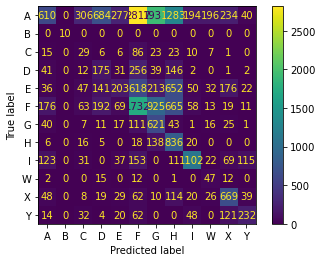

In [11]:
plot_confusion_matrix(model,x,y)

In [12]:
# 80 / 20 Split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 520)

In [13]:
model_split = GaussianNB()
model_split.fit(x_train,y_train)
yhat_split = model.predict(x_test)

In [14]:
#Evaluate the model
metrics.accuracy_score(y_test,yhat_split)

0.29587925251557257

In [15]:
print(metrics.classification_report(y_test,yhat_split))

              precision    recall  f1-score   support

           A       0.53      0.07      0.12      1753
           B       1.00      1.00      1.00         2
           C       0.05      0.12      0.07        40
           D       0.14      0.25      0.18       143
           E       0.31      0.10      0.15       452
           F       0.28      0.44      0.35       735
           G       0.17      0.73      0.28       187
           H       0.21      0.83      0.34       186
           I       0.71      0.63      0.66       337
           W       0.15      0.63      0.24        19
           X       0.49      0.67      0.56       213
           Y       0.43      0.39      0.41       107

    accuracy                           0.30      4174
   macro avg       0.37      0.49      0.36      4174
weighted avg       0.42      0.30      0.26      4174



In [16]:
#Cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=520)

for train, test in kfold.split(x,y):
    
#     model_cv = GaussianNB()
#     model.fit(x.iloc[train], y.iloc[train])
#     y_hat_cv = model.predict(x.iloc[test])
#     probV = metrics.accuracy_score(y.iloc[test],y_hat_cv)
#     probV

In [17]:
#Evaluate model
metrics.accuracy_score(y.iloc[test],y_hat_cv)

0.2875629043853343

In [19]:
x.values()

TypeError: 'numpy.ndarray' object is not callable